# [LEGALST-123] Lab 05: Central Limit Theorem, Confidence Intervals, Hypothesis Testing

In [3]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.express as px

## Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by allowing students to contextualize the statistical ideas of the Central Limit Theorem and hypothesis testing by using a dataset containing continuous variables. 

**Data & EDA**: 
... explanation needed ... 

**Hypothesis Testing**
... explanation needed ... 

**Bootsrapping & Cofidence Interval**:
... explanation needed ... 

**Central Limit Theorem**: 
... explanation needed ... 

<br/>

<hr style="border: 1px solid #fdb515;" />

## Data & Exploratory Data Analysis

For this lab, we'll be using the same datasets used in our previous labs: the Nashville police stops dataset. Run the following cell below to read the `DataFrame`.

In [4]:
stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville_sample.csv", index_col=0)
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


Let's refer back to our last lab, where we explored different distributions using histograms. In particular, we looked at the distribution of stop counts for `"subject_sex"` and `"subject_age"`. For this notebook, let's look at the distribution of **age for each race**.

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.1**:
Before explore these variables, let's clean the dataset. In the code cell below, drop any columns that have "raw" in their column names. Then, drop the rows with *any* null values EXCEPT for the columns` "contraband_found"`, `"contraband_drugs"`, `"contraband_weapons"`, `"search_basis"`, and `"notes"`.
</div>

Hint: Look at Lab 04 question 1.1 and question 1.2! It should be very similar. 

In [ ]:
# YOUR ANSWER HERE. You can use more or less lines than provided below. 
# ... 
# ... 
# ...
# stops = ...

# stops.head(5)

In [20]:
# SOLUTION 
raw_columns = [col for col in stops.columns if 'raw_' in col]
necessary_cols = stops.columns.drop(["contraband_found", "contraband_drugs", "contraband_weapons", "search_basis", "notes"]) #SOLUTION 
stops = stops.dropna(subset=necessary_cols,axis=0)
stops = stops.drop(raw_columns, axis=1)

stops.head(5)

,index,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes
1,492044,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,45.0,...,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,tail light out
2,431170,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,21.0,...,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN
3,2066423,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,35.0,...,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,NaN
5,543402,2012-12-13,67560.0,"3RD AVE S & ASH ST, NASHVILLE, TN, 37210",36.152786,-86.770562,4.0,4005.0,425.0,26.0,...,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,RAN STOP SIGN
6,1446083,2012-02-26,55380.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,18.0,...,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN


Let's explore the columns `"subject_race"` and `"subject_age"`. For convenience, we have provided code below showing what race/ethincity categories exist within the column  `"subject_race"`. For this particular question, let's look at the distribution of people who are categorized as `'hispanic'` or `'white'` for `"subject_race"`. 

In [21]:
stops["subject_race"].unique()

array(['black', 'white', 'hispanic', 'unknown', 'asian/pacific islander',
       'other'], dtype=object)

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.2**:

In the cell below, use Plotly to plot a histogram showing the distribution of age for people who are categorized as Hispanic with the y axis representing percentage. To do this, first create a table called `subject_hispanic` with your manipulations. Use `range_x=[0,80]` to properly scale the histogram.

Hint 1: [here](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) is the documentation for Plotly's histogram method.

Hint 2: Take a look at the `histnorm` attribute of the histogram method!

</div>

In [ ]:
# YOUR CODE HERE

# subject_hispanic = ... 

# Histogram

In [22]:
# SOLUTION
subject_hispanic = stops[stops['subject_race'] == 'hispanic']
px.histogram(subject_hispanic, x='subject_age', histnorm='percent', range_x=[0, 80])

**Find the 25th, 50th, 75th percentile of `subject_hispanic` below.**

In [ ]:
# YOUR CODE HERE
# Find the 25th percentile

In [ ]:
# Find the 50th percentile

In [ ]:
# Find the 75th percentile

In [9]:
# SOLUTIONS
percentile(25, subject_hispanic['subject_age'])
percentile(50, subject_hispanic['subject_age'])
percentile(75, subject_hispanic['subject_age'])

37.0

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.3**:

Now, follow the same process for people who are categorized as White. Again, to do this, first create a table called `subject_white` with your manipulations.

</div>

In [ ]:
# YOUR CODE HERE

# subject_white = ... 

# Histogram

In [23]:
# SOLUTION
subject_white = stops[stops['subject_race'] == 'white']
px.histogram(subject_white, x='subject_age', histnorm='percent', range_x=[0, 80])

**Find the 25th, 50th, 75th percentile of `subject_white` below.**

In [ ]:
# YOUR CODE HERE
# Find the 25th percentile

In [ ]:
# Find the 50th percentile

In [ ]:
# Find the 75th percentile

In [ ]:
# SOLUTIONS
percentile(25, subject_white['subject_age'])
percentile(50, subject_white['subject_age'])
percentile(75, subject_white['subject_age'])

37.0

<!-- BEGIN QUESTION -->
<div class=“alert alert-warning”>

#### **Question 1.4**:

Now, create an overlaid historgram comparing the two distributions.

</div>

In [ ]:
# YOUR ANSWER HERE

In [26]:
combined = pd.concat([subject_hispanic, subject_white])
px.histogram(combined, x='subject_age', color='subject_race', histnorm='percent',barmode='overlay')


**What do you notice about the two distributions? How do they compare?**

_YOUR ANSWER HERE_

## Bootstrapping and the Confidence Interval

Bootstrapping is a statistical technique that allows us to make educated guesses about a population using only a small sample from that population. It works by repeatedly taking small random samples from the data we have and then using these samples to estimate things like averages, variances, or other statistics, as if we had data for the entire population. This technique helps us understand how uncertain or variable our estimates are and is especially useful when we don't have access to the whole population's data.


###  A Random Sample and an Estimate
Let's first draw from the sample, at random with replacement, the same number of times as the original sample size.

It is important to resample the same number of times as the original sample size. The reason is that the variability of an estimate depends on the size of the sample.

If we drew  at random without replacement, we would just get the same sample back. By drawing with replacement, we create the possibility for the new samples to be different from the original, because some participants might be drawn more than once and others not at all.

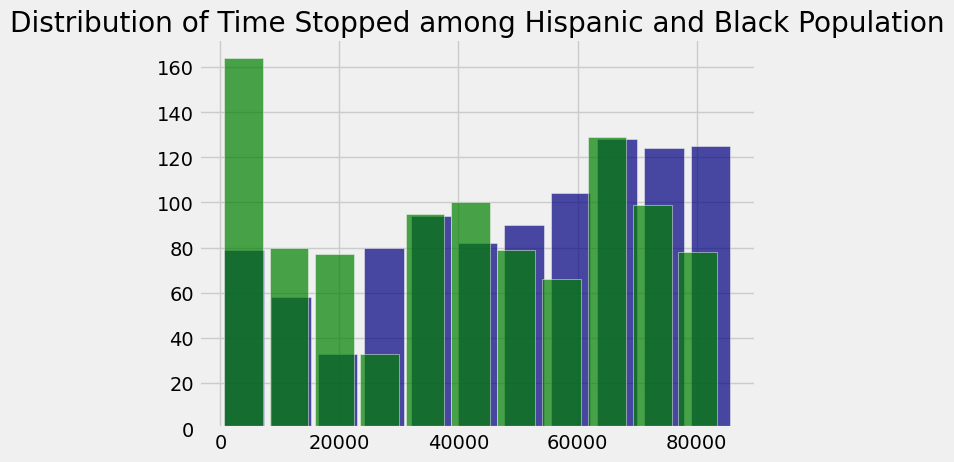

In [8]:
# Fill out the blanks in this skeleton code
b_resampled = stops[stops['subject_race'] == 'black'].sample(len(stops['subject_race'] == 'black'), replace = True)
h_resampled = stops[stops['subject_race'] == 'hispanic'].sample(len(stops['subject_race'] == 'hispanic'), replace = True)

plt.hist(b_resampled['time'], bins='auto', color='navy', alpha=0.7, rwidth=0.85)

plt.hist(h_resampled['time'], bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Time Stopped among Hispanic and Black Population');


In [57]:
# Now let's calculate the mean difference between the two datasets that we drew
# If you run this multiple times, you will see that we get different results
resample_mean = np.mean(b_resampled['time']) - np.mean(h_resampled['time'])
resample_mean


6980.8588957055181

### Resampling from the Sample

By resampling again and again, we can get many such estimates, and hence an `empirical distribution` of the estimates.

Let us collect this code and define a function one_bootstrap_mean that returns one bootstrapped mean of total compensation, based on bootstrapping our original dataset

In [58]:
def one_bootstrap_mean():
    b_resampled = stops[stops['subject_race'] == 'black'].sample(len(stops['subject_race'] == 'black'), replace = True)
    h_resampled = stops[stops['subject_race'] == 'hispanic'].sample(len(stops['subject_race'] == 'hispanic'), replace = True)
    bootstrapped_mean = np.mean(b_resampled['time']) - np.mean(h_resampled['time'])
    return bootstrapped_mean

Run the cell below a few times to see how the bootstrapped means vary. Remember that each of them is an estimate of the population mean.

In [60]:
one_bootstrap_mean()

4996.5644171779131

We can now repeat the bootstrap process multiple times by running a `for` loop as usual. In each iteration, we will call the function `one_bootstrap_mean` to generate one value of the bootstrapped mean based on our original dataset. Then we will append the boostrapped mean to the collection array `bstrap_means`.

Let's do 2000 repetitions for this round of bootstrapping! (since this is a large number the code might take a while to run)

In [61]:
num_repetitions = 2000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append (bstrap_means, one_bootstrap_mean())

Now let's visualize what we got from the bootstrapped process

Text(0, 0.5, 'Frequency')

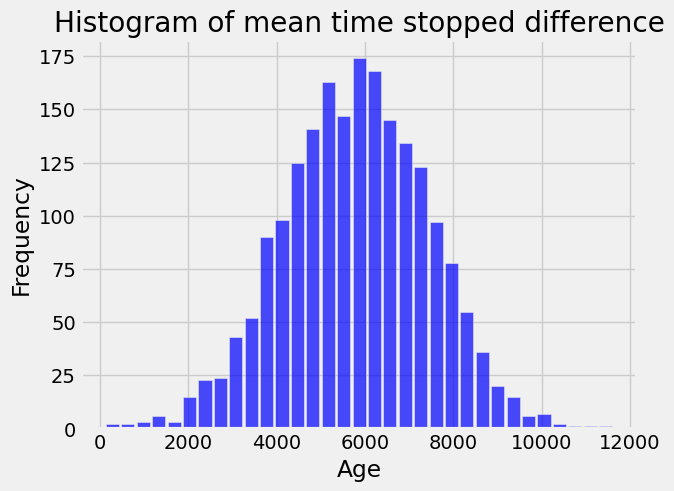

In [62]:
plt.hist(bstrap_means, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of mean time stopped difference')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Confidence Interval

Confidence interval is an important tool in hypothesis testing. It helps us figure out if the observed effect is statistically important. If the interval has zero in it, we don't have enough evidence to reject the null hypothesis. But if zero is not in the interval, it means  we can reject the hypothesis and states that there are significant differences between these two racial groups. This information guides our decisions with more accuracy.

In this lab we will be using the 95% confident interval (the 2.5th to 97.5th interval) to see if the parameter is included. 

In [63]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([ 2511.90184049,  8867.11656442])

Now let's add the confidence interval to the histogram above

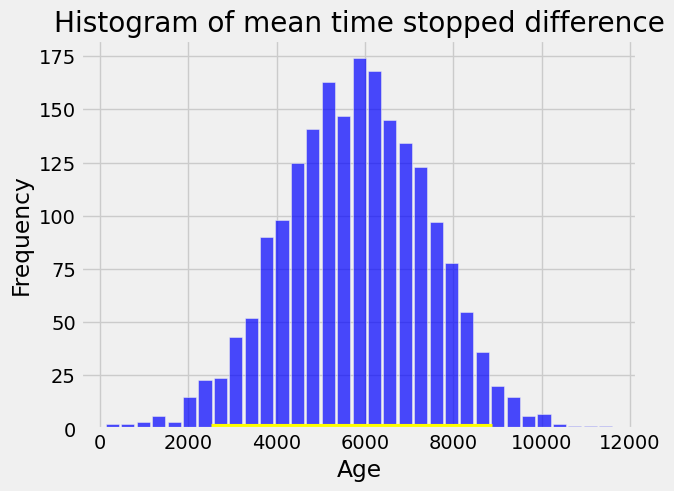

In [64]:
plt.hist(bstrap_means, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of mean time stopped difference')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.plot([left, right], [0, 0], color='yellow', lw=8);

As you can see from the graph and the confident interval we got, 0 is not include in the 95% confidence interval. As a result, we can say that there is a significant difference between the two racial groups and reject the null hypothesis. 

## 4. Central Limit Theorem (CLT)

**The Central Limit Theorem (CLT)** is a fundamental concept in statistics that has significant implications for making inferences about populations based on samples. It states that, regardless of the shape of the original population distribution, the distribution of the sample means will approach a normal distribution as the sample size increases. This is true as long as the sample size is sufficiently large.

The significance of the Central Limit Theorem lies in its ability to provide a bridge between the characteristics of a population and the properties of the sample means drawn from that population.

**Population Mean:**

The Central Limit Theorem tells us that the sampling distribution of the mean of a random sample will be approximately normally distributed, even if the population distribution is not normal.
This is crucial because it allows us to make inferences about the population mean using statistical methods that assume a normal distribution.

**Sample Size:**

The larger the sample size, the closer the distribution of the sample mean will be to a normal distribution according to the CLT.
As the sample size increases, the standard deviation of the sampling distribution decreases. This means that larger sample sizes provide more precise estimates of the population mean.

To demonstrate this, let's look at the original dataset and data we obtained from bootstrapping above.

First, let's look at the distributions of the time stopped among the Black population and Hispanic population.

(array([ 45.,  26.,  18.,  48.,  54.,  65.,  51.,  42.,  73.,  67.]),
 array([  6.00000000e+01,   8.68200000e+03,   1.73040000e+04,
          2.59260000e+04,   3.45480000e+04,   4.31700000e+04,
          5.17920000e+04,   6.04140000e+04,   6.90360000e+04,
          7.76580000e+04,   8.62800000e+04]),
 <BarContainer object of 10 artists>)

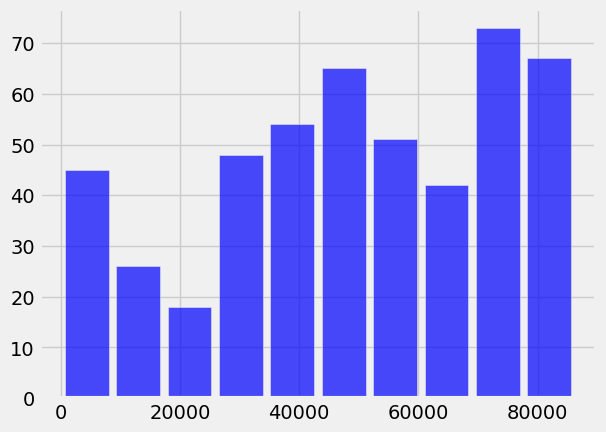

In [65]:
plt.hist(b_resampled['time'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

(array([ 85.,  26.,  35.,  73.,  25.,  31.,  44.,  63.,  61.,  46.]),
 array([  6.00000000e+01,   8.41200000e+03,   1.67640000e+04,
          2.51160000e+04,   3.34680000e+04,   4.18200000e+04,
          5.01720000e+04,   5.85240000e+04,   6.68760000e+04,
          7.52280000e+04,   8.35800000e+04]),
 <BarContainer object of 10 artists>)

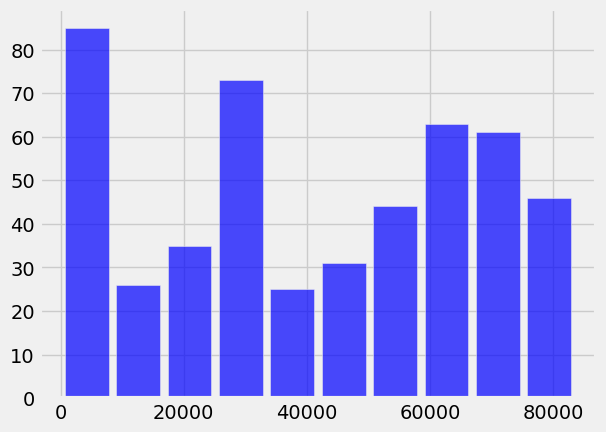

In [54]:
plt.hist(h_resampled['time'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)

Now, let's look at the difference of mean between these two samples

(array([   2.,    2.,    3.,    6.,    3.,   15.,   23.,   24.,   43.,
          52.,   90.,   98.,  125.,  141.,  163.,  147.,  174.,  168.,
         145.,  134.,  123.,   97.,   78.,   55.,   36.,   20.,   15.,
           6.,    7.,    2.,    1.,    1.,    1.]),
 array([   110.06134969,    458.87711471,    807.69287972,   1156.50864473,
          1505.32440974,   1854.14017475,   2202.95593977,   2551.77170478,
          2900.58746979,   3249.4032348 ,   3598.21899981,   3947.03476483,
          4295.85052984,   4644.66629485,   4993.48205986,   5342.29782487,
          5691.11358989,   6039.9293549 ,   6388.74511991,   6737.56088492,
          7086.37664993,   7435.19241495,   7784.00817996,   8132.82394497,
          8481.63970998,   8830.455475  ,   9179.27124001,   9528.08700502,
          9876.90277003,  10225.71853504,  10574.53430006,  10923.35006507,
         11272.16583008,  11620.98159509]),
 <BarContainer object of 33 artists>)

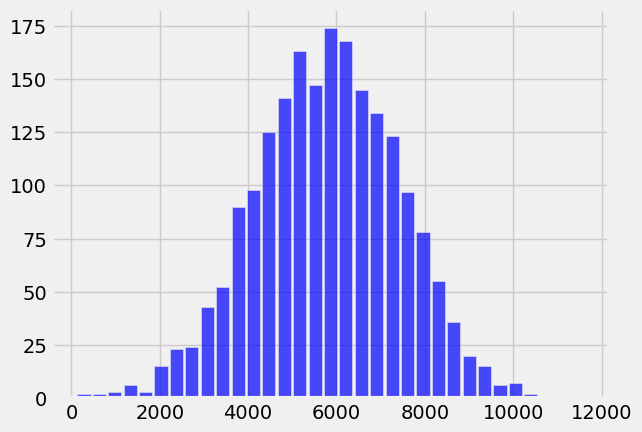

In [66]:
plt.hist(bstrap_means, bins='auto', color='blue', alpha=0.7, rwidth=0.85)

As we can see from above, even the original distributions have nothing in common with the normal distribution. It will form a somewhat-normal distribution after we conduct bootstrapping. 

Now, let's connect the Central Limit Theorem to the motivation behind using **regression**:

In regression analysis, the Central Limit Theorem is often invoked when dealing with the distribution of the regression coefficients.
The ordinary least squares (OLS) estimators, which are commonly used in regression analysis, are unbiased and efficient under the assumption of normally distributed errors.
The CLT justifies the use of statistical tests and confidence intervals for regression coefficients, as it ensures that the distribution of these coefficients becomes approximately normal as the sample size increases.

In summary, the Central Limit Theorem is significant because it allows statisticians to make valid inferences about population parameters, particularly the population mean, based on samples. This is crucial in various fields, including regression analysis, where assumptions about the distribution of coefficients play a key role in drawing conclusions about relationships between variables.